INFO6105 Instructor: Dr. Handan Liu

Homework 5

Grading: total 100 points

Dhruvil Shah (NUID - 001873473)

In [25]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from IPython.display import Image

%matplotlib inline

# 1. Parameter tuning (total 32 points)

## Goal: 
### (0) read in the iris dataset: iris = load_iris()

In [26]:
iris = load_iris()

### (1) create X (features) and y (response) [4pts]

In [27]:
X = iris.data
y = iris.target

print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', y.shape)

X matrix dimensionality: (150, 4)
Y vector dimensionality: (150,)


### (2) 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter), scoring is 'accuracy' [8pts]

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


### (3) use average accuracy as an estimate of out-of-sample accuracy [4pts]

In [29]:
print(scores.mean())

0.9666666666666668


### (4) search for an optimal value of K for KNN [10pts]

In [30]:
# list of integers 1 to 30
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# Loop through to find correct value of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


### (5) plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis) [6pts]

Text(0, 0.5, 'Cross-Validated Accuracy')

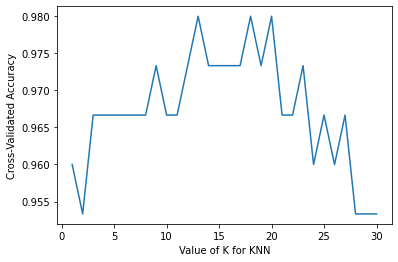

In [31]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# 2. Model selection (total 12 points)

## Goal: Compare the best KNN model with logistic regression on the iris dataset
### (1) 10-fold cross-validation with the best KNN model, scoring is 'accuracy' [6pts]

In [32]:
knn = KNeighborsClassifier(n_neighbors=20)

print("Accuracy:",cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

Accuracy: 0.9800000000000001


### (2) 10-fold cross-validation with logistic regression, scoring is 'accuracy' [6pts]

In [33]:
logreg = LogisticRegression( max_iter = 1000)

print("Accuracy:",cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

Accuracy: 0.9733333333333334


# 3. Feature selection (total 36 points)

## Goal: Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset
### (0) read in the advertising dataset

In [34]:
data = pd.read_csv("Advertising.csv", index_col=0)

### (1) create a Python list of three feature names: TV, radio, newpaper (5 points)

In [35]:
feature_cols = ['TV', 'Radio', 'Newspaper']

### (2) use the list to select a subset of the DataFrame (X) (5 points)

In [36]:
X = data[feature_cols]

### (3) select the sales column as the response (y) (5 points)

In [37]:
y = data.Sales

### (4) 10-fold cross-validation with all three features, scoring is 'neg_mean_squared_error' (6 points) 

In [38]:
lm = LinearRegression()

scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


### (5) fix the sign of MSE scores (5 points)

In [39]:
mse_scores = -scores
print(mse_scores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


### (6) convert from MSE to RMSE (5 points)

In [40]:
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


### (7) calculate the average RMSE (5 points)

In [41]:
print(rmse_scores.mean())

1.6913531708051797


### (8) 10-fold cross-validation with two features (excluding Newspaper), scoring is'neg_mean_squared_error' (10)

In [42]:
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.6796748419090766


# 4. Contruct a decision tree (total 20 points)

### (1) After loading Breast Cancer dataset, print the target names (target_names) and feature names (feature_names). [4 pts] 

In [43]:
breast_cancer = load_breast_cancer()

print("Target Names:",breast_cancer.target_names)
print("Feature Names: \n",breast_cancer.feature_names)

Target Names: ['malignant' 'benign']
Feature Names: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### (2) Split the dataset into 2 parts: half for traning and another half for testing [2pts], and instantiate the decision tree model (setting max_depth=4) [2pts] to get the accuracy score for testing data[2pts]. [6 pts]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size = 0.5 , random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print(f"Decision tree training set accuracy: {format(tree.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(tree.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.9859 
Decision tree testing set accuracy: 0.9193 


### (3) Drawing a decision tree using graphviz with the parameters as: 'class_names' is set as malignant and benign, 'feature_names' is set as the feature names, 'impurity' is False and 'filled' is True; output the tree as a file. [5pts]     read in this file and visualize this tree graph. [5pts]

In [91]:
dot_data = export_graphviz(tree, 
                  feature_names=breast_cancer.feature_names,  
                  class_names=breast_cancer.target_names, impurity = False,
                  filled=True,out_file="Decision_Tree")

In [92]:
graphviz.render(engine = "dot",format = "png",filepath="Decision_Tree")

'Decision_Tree.png'

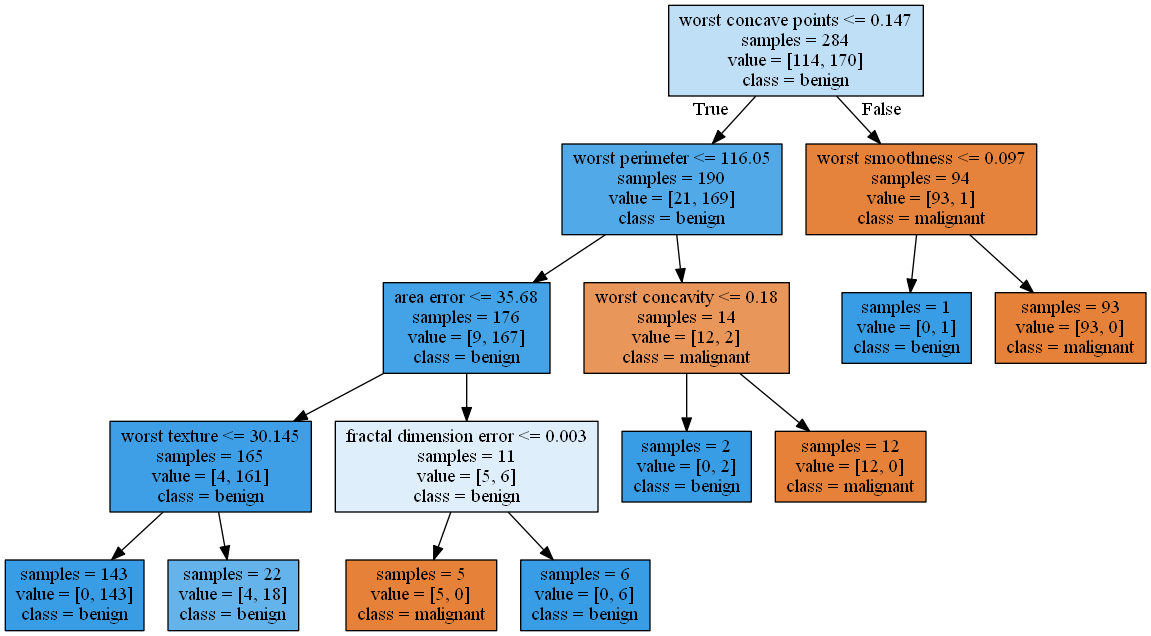

In [93]:
Image(filename='Decision_Tree.png')